#Assignment 1) Forest Fire

In [ ]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
forest = pd.read_csv("forestfires.csv")
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [ ]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forest.shape

(517, 31)

In [ ]:
numerical_feature = forest.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


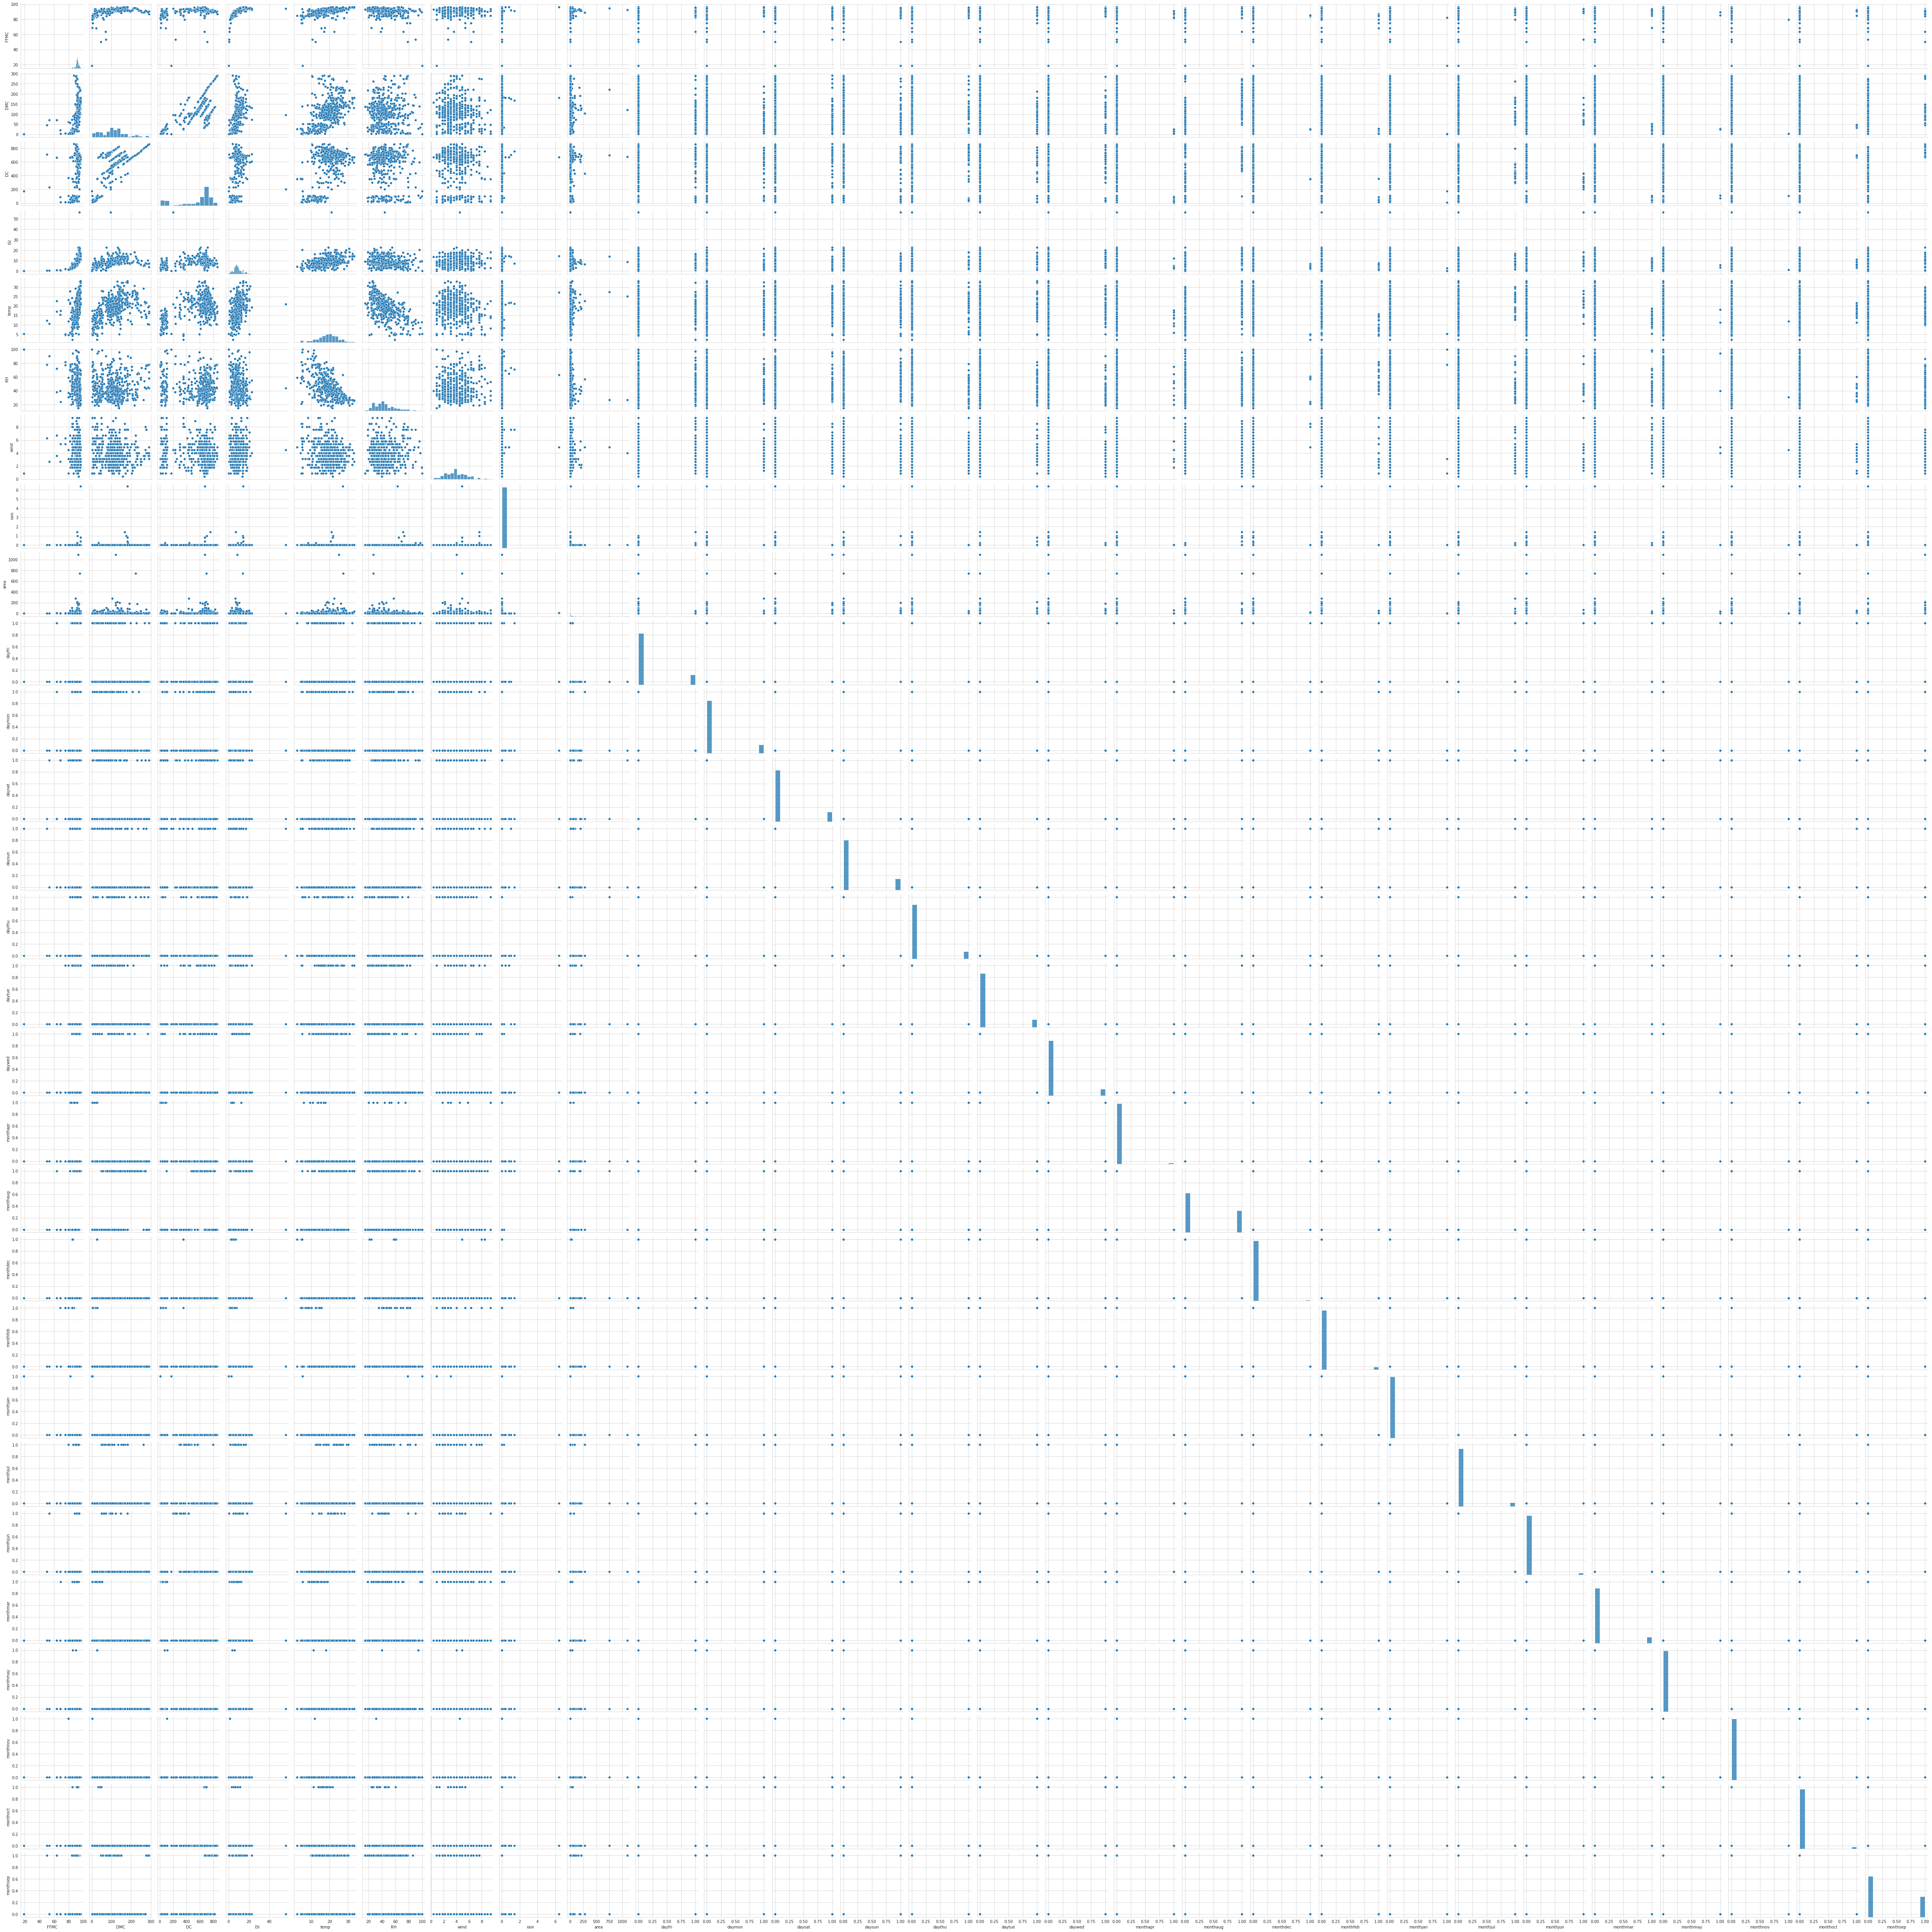

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(forest[numerical_feature])
plt.show()

In [ ]:
categorical_features = forest.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


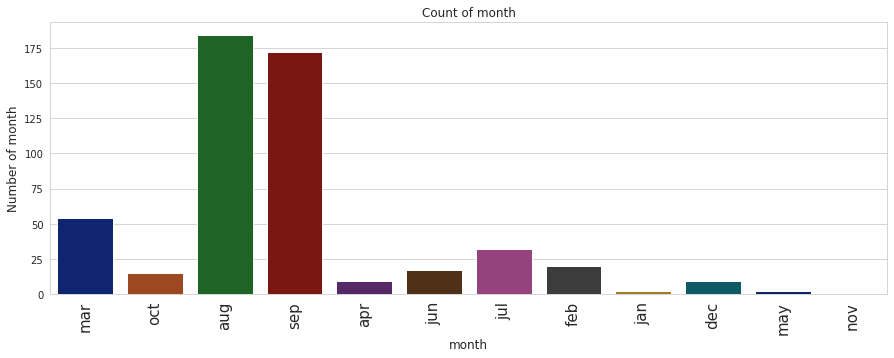

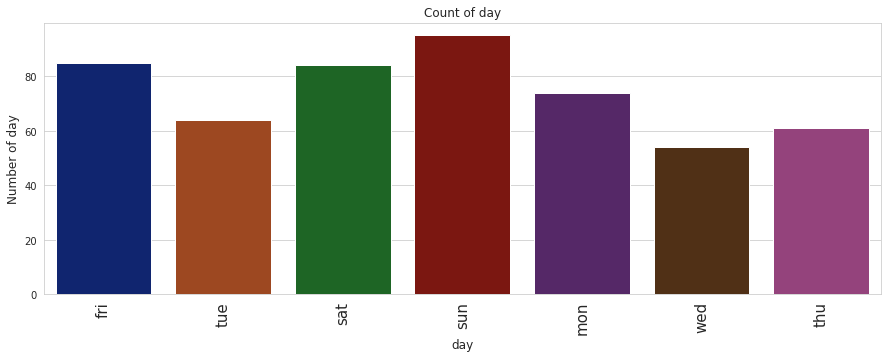

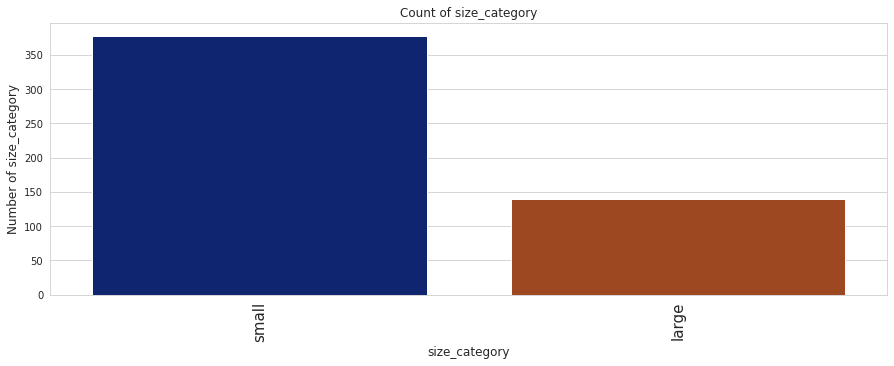

In [ ]:
print(categorical_features)



for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    df = forest.copy()
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=forest, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [ ]:
forest_1= forest.iloc[:,2:30]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(forest_1)
forest_norm = sc.transform(forest_1)
forest_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(forest_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -6.05082538e-15, -1.58743875e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -2.67236885e-15, -6.92610536e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  5.92028990e-15,  8.36530871e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -6.98934052e-16,  4.03200598e-18],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.57925976e-16, -3.39227990e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  6.17289277e-17, -8.31075187e-17]])

In [ ]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 3.42850975e-33])

In [ ]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

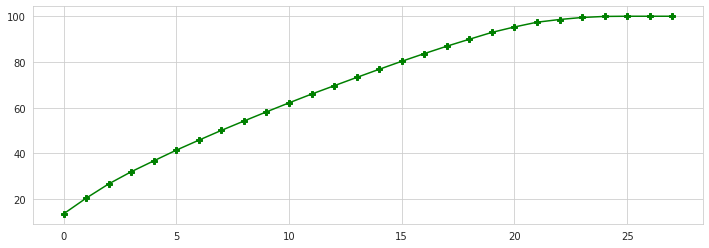

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "P");

In [ ]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
 'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
 'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
 'pc22','pc23','pc24']),
 forest[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    3.766709 -1.320255 -0.843971 -1.994738 -1.453359  0.693985  0.308104   
1    0.390786  0.831062 -1.101365  1.400671  2.869388  0.965898 -2.795574   
2    0.690416  1.177746 -1.221998  2.442038  1.090630  0.390801 -1.586675   
3    3.359951 -1.161443  0.385728 -2.118328 -1.949601  1.027664 -0.179422   
4    2.974329 -0.842626  1.327788  0.038086 -1.124763 -0.574676 -0.777155   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.087560  0.153964  1.241810  1.536581  0.372425 -1.133422 -0.362287   
513  0.794366 -0.083966  2.670485  0.284995  0.223323 -0.904232 -0.014849   
514  0.921634 -0.264543  2.719216 -0.019643  0.242195 -0.966939 -0.118080   
515 -1.620549 -0.978838  0.331987  1.256638 -0.408164  0.735698  0.815510   
516  4.075907 -0.367441 -0.247152  0.979966  6.792273  5.943666 -1.639583   

          pc8       pc9      pc10  ...       pc16      pc17      pc18  \
0   -0.019764  0.010161 -0.437314  ...  -0.197543 -0.021839  0.688958   
1    0.041095 -0.548879  0.104500  ...  -2.503167  0.499649  0.563706   
2   -2.159336 -0.090580  0.260888  ...  -2.545144 -0.658411 -0.423618   
3   -0.250227 -0.620329 -1.343189  ...  -0.040887  0.017843  0.332572   
4    0.303635  0.861126 -2.024719  ...   0.844431  1.014944 -0.618231   
..        ...       ...       ...  ...        ...       ...       ...   
512  0.766946  0.818745 -0.289632  ...   0.300522  0.513876  0.539642   
513  0.107226  1.340049 -0.147246  ...   0.342367  0.485571  0.580150   
514  0.123010  1.290364 -0.177553  ...   0.332816  0.344047  0.122409   
515 -1.398344  0.076379 -0.005814  ...  -0.011739 -1.035533 -0.774382   
516  8.121827 -0.627980  4.953722  ...  10.467443 -7.333036  0.377340   

         pc19      pc20      pc21      pc22      pc23      pc24  size_category  
0    0.563603 -0.439596 -0.926619 -0.405425 -0.118719 -0.017933              0  
1   -0.703319 -1.535718 -0.892995  0.836590  0.204975  0.290771              0  
2    0.860550 -1.195230 -0.297870  0.743648  0.081757  0.345915              0  
3    1.164745 -1.632741 -0.817618  1.523710 -0.342302 -0.378420              0  
4    0.822853 -1.794109 -0.723371  2.020419 -0.545591  0.161735              0  
..        ...       ...       ...       ...       ...       ...            ...  
512 -0.052958  1.898628 -1.441786 -0.821192 -1.205707 -0.698666              1  
513  0.384984  0.086251 -0.970693 -1.353365 -1.254890 -1.212175              1  
514  0.313948  0.211157 -0.777731 -1.736711 -1.154127 -1.230040              1  
515 -0.216315  0.515791  0.080575 -0.055548 -0.067502 -0.311027              0  
516  8.870354 -1.074288  2.382433  1.042850  0.296436  0.125099              0  

[517 rows x 25 columns]

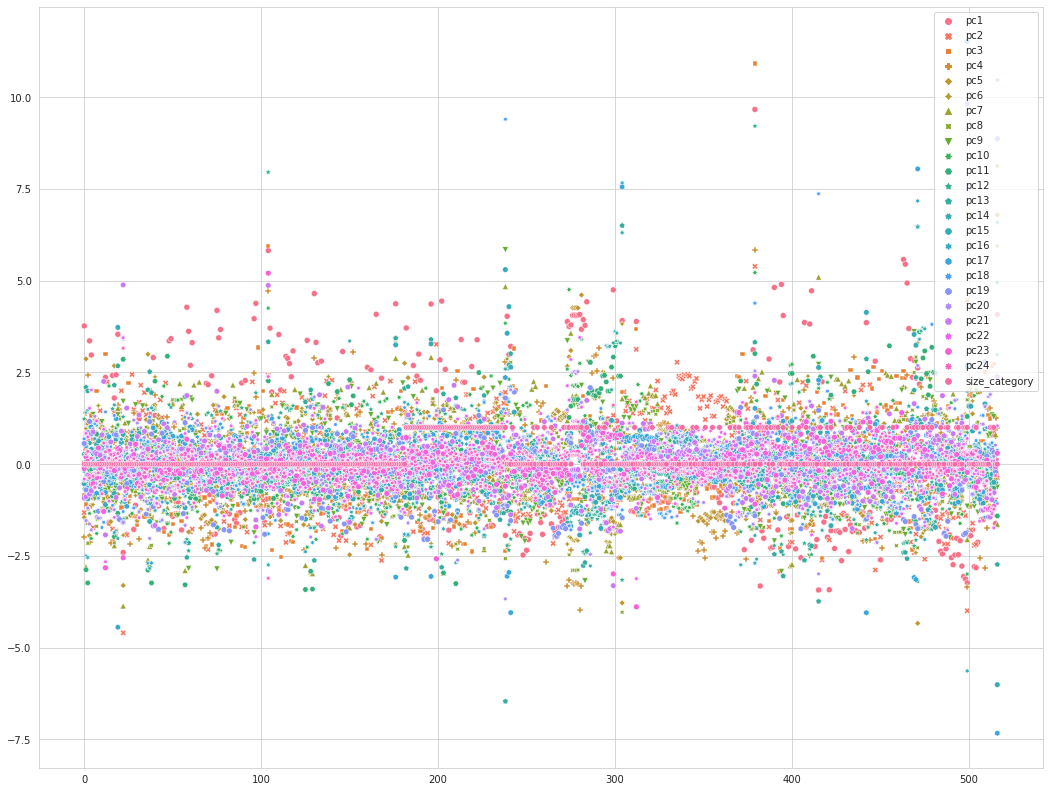

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(18,14))
sns.scatterplot(data=finalDf)

In [ ]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 2s 14ms/step - loss: 0.6924 - accuracy: 0.5679 - val_loss: 0.6836 - val_accuracy: 0.5962
Epoch 2/150
37/37 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.7147 - val_loss: 0.6563 - val_accuracy: 0.6731
Epoch 3/150
37/37 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.7368 - val_loss: 0.6385 - val_accuracy: 0.6667
Epoch 4/150
37/37 [==============================] - 0s 5ms/step - loss: 0.5691 - accuracy: 0.7479 - val_loss: 0.6303 - val_accuracy: 0.6667
Epoch 5/150
37/37 [==============================] - 0s 6ms/step - loss: 0.5434 - accuracy: 0.7701 - val_loss: 0.6300 - val_accuracy: 0.6795
Epoch 6/150
37/37 [==============================] - 0s 6ms/step - loss: 0.5246 - accuracy: 0.7756 - val_loss: 0.6337 - val_accuracy: 0.6795
Epoch 7/150
37/37 [==============================] - 0s 6ms/step - loss: 0.5119 - accuracy: 0.7729 - val_loss: 0.6402 - val_accuracy: 0.6859
Epoch 8/150


In [ ]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.9284
accuracy: 92.84%


# Assignment 2) Gas Turbines

In [81]:
!pip install plotly
! pip install tensorflow
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# Importing the Dataset
gas_turbines = pd.read_csv('gas_turbines.csv')
gas_turbines.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

#EDA

In [83]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


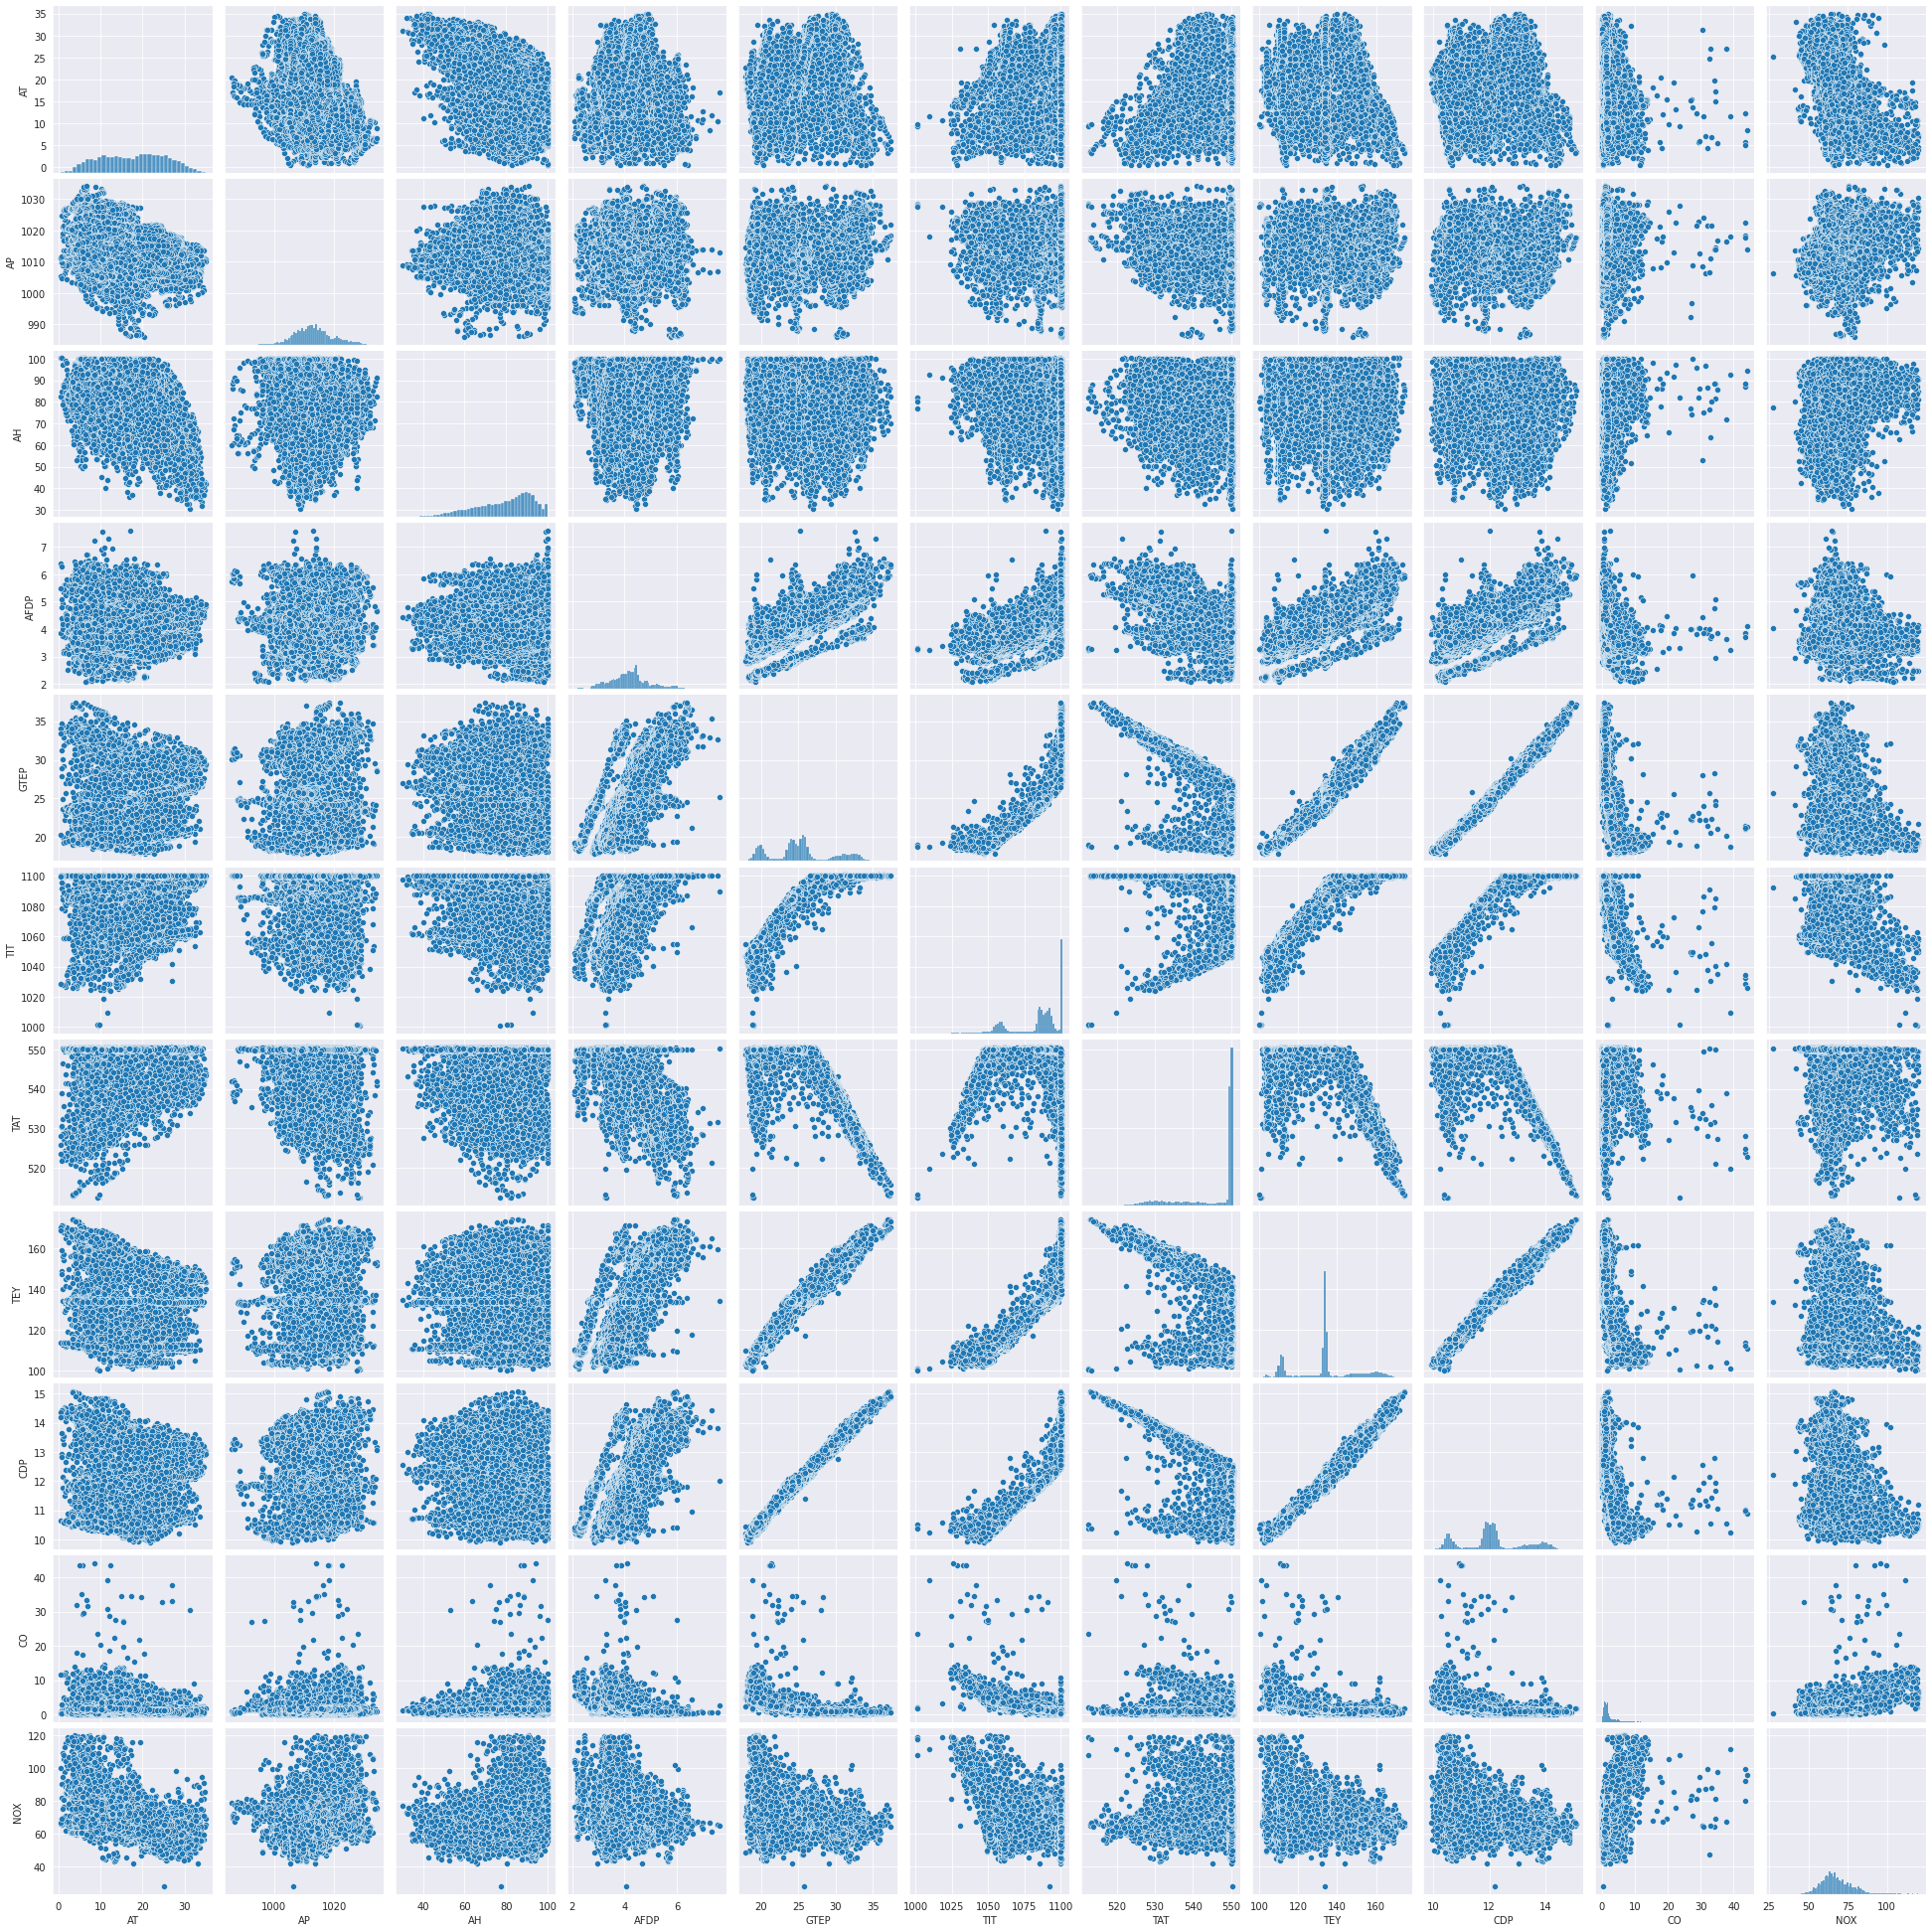

In [84]:
sns.set_style('darkgrid')
sns.pairplot(gas_turbines)
plt.show()

In [85]:
gas_turbines.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

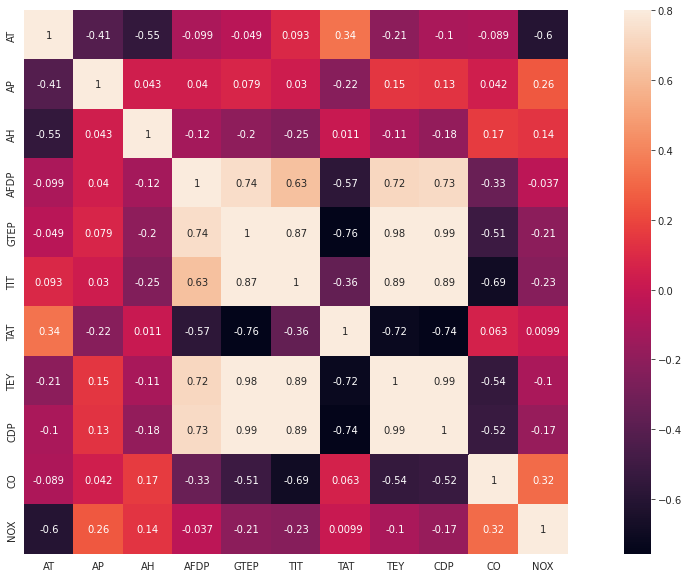

In [86]:
# Heat map show correlation matrix
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = gas_turbines.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [87]:
# Splitting the dataset into input & output variables
Y = gas_turbines['TEY']
X = gas_turbines.drop(['TEY'], axis=1)
print(X)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.7

In [88]:
print(Y)

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64


Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

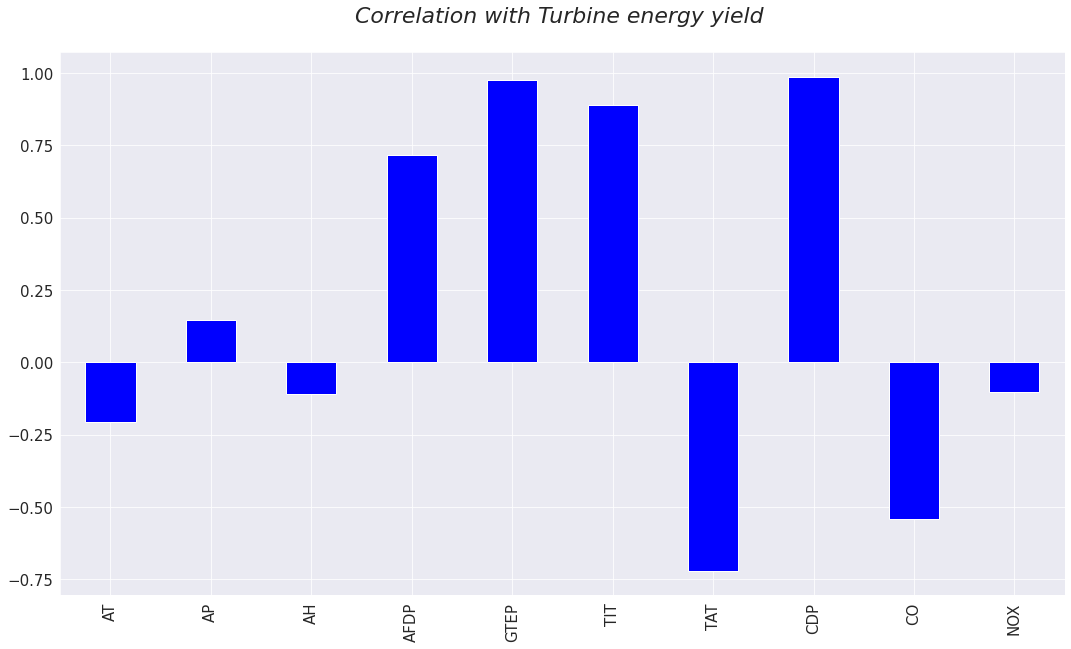

In [89]:
# Correlation with TEY

data2 = X.copy()

correlations = data2.corrwith(gas_turbines["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'b',
        rot = 90, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "italic", 
fontsize = "22", fontfamily = "sans-serif")

In [90]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [91]:
# Feature Selection

def select_features(X_train, y_train, X_test):
    
    # Configuring to select all features
    features = SelectKBest(score_func=mutual_info_regression, k='all')
    
    # Relationships from training data
    features.fit(X_train, y_train)
    
    # Transforming train data
    X_train_f = features.transform(X_train)
    
    # transforming test data
    X_test_f = features.transform(X_test)
    
    return X_train_f, X_test_f, features

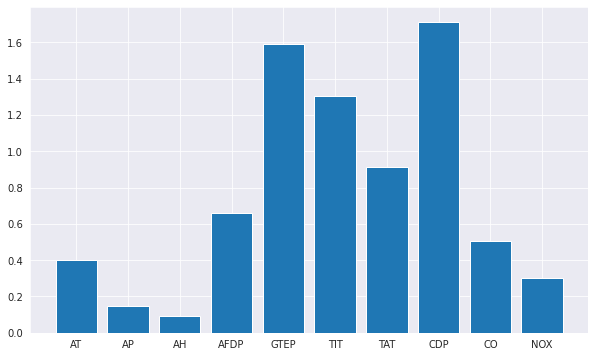

In [92]:
X_train_f, X_test_f, features = select_features(X_train, y_train, X_test)
fig, axes = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(features.scores_))], features.scores_)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(X.columns.values)
plt.show()

In [93]:
y_copy = gas_turbines["TEY"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y_ = StandardScaler().fit_transform(y_copy.values.reshape(len(y_copy),1))[:,0]


X1 = gas_turbines.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
scaler.fit(X1)


#X_copy = X[['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']]
features_scaler=scaler.fit_transform(X1)
X_=pd.DataFrame(features_scaler,columns=X[['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']].columns)
X_.head()

AFDP      GTEP       TIT       TAT       CDP
0 -0.921232 -1.379101 -1.488376  0.585240 -1.357331
1 -0.921495 -1.363528 -1.482325  0.585240 -1.363676
2 -0.944385 -1.351309 -1.476275  0.568715 -1.360957
3 -0.946884 -1.348194 -1.464173  0.583969 -1.356424
4 -0.924389 -1.354663 -1.458123  0.582698 -1.350985

In [94]:
# Splitting the data into test data and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y_, test_size=0.3, random_state=1)

In [95]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [96]:
model = Sequential()
model.add(Dense(28, input_dim=5, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

#***Model Complie : Mean Squared Error***

In [97]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

In [98]:
model.summary()

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_363 (Dense)           (None, 28)                168       
                                                                 
 dense_364 (Dense)           (None, 50)                1450      
                                                                 
 dense_365 (Dense)           (None, 50)                2550      
                                                                 
 dense_366 (Dense)           (None, 1)                 51        
                                                                 
Total params: 4,219
Trainable params: 4,219
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Fitting the model
history = model.fit(X_train,y_train, epochs=500)

Epoch 1/500
329/329 [==============================] - 2s 3ms/step - loss: 0.1821 - mean_squared_error: 0.1821 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 676.5138 - cosine_proximity: 0.5309
Epoch 2/500
329/329 [==============================] - 1s 2ms/step - loss: 0.0523 - mean_squared_error: 0.0523 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 787.7946 - cosine_proximity: 0.5718
Epoch 3/500
329/329 [==============================] - 1s 2ms/step - loss: 0.0399 - mean_squared_error: 0.0399 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 708.0866 - cosine_proximity: 0.5775
Epoch 4/500
329/329 [==============================] - 1s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 600.6892 - cosine_proximity: 0.5737
Epoch 5/500
329/329 [==============================] - 1s 2ms/step - loss: 0.0425 - mean_squared_error: 0.0425 - mean_absolute_error: 0.1617 - mean_absolute

In [101]:
# Model Evaluation
scores = model.evaluate(X_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 2ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 209.3522 - cosine_proximity: 0.6117
mean_squared_error


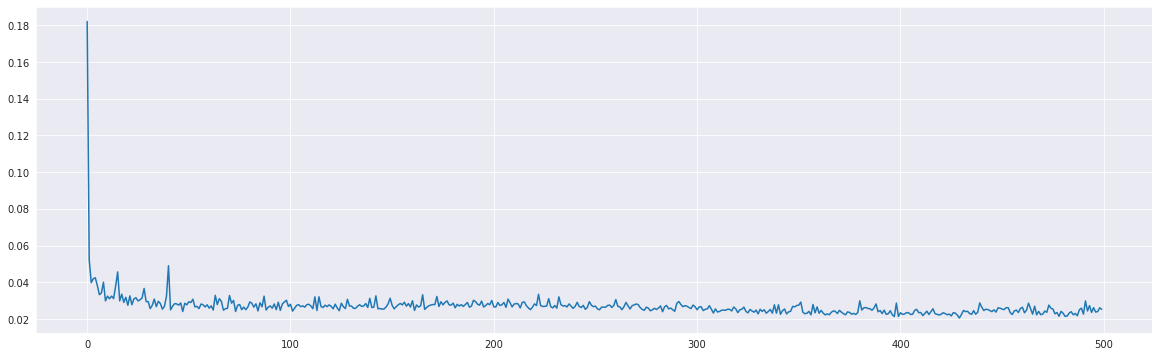

In [102]:
fig, axes = plt.subplots(figsize=(20, 6))
# plot metrics
plt.plot(history.history['mean_squared_error'])
"""plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['cosine_proximity'])
"""
plt.show()

In [104]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

141/141 [==============================] - 1s 4ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 209.3522 - cosine_proximity: 0.6117
mean_squared_error: 2.71%


In [107]:
def baseline_model():
    model =  tf.keras.models.Sequential()
    model.add( tf.keras.layers.Dense(10, input_dim=10, activation='tanh'))
    model.add( tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [110]:
import tensorflow as tf
import sklearn

from sklearn.model_selection import KFold
estimator = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = sklearn.model_selection.cross_val_score(estimator, X, y_, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.96 (0.33) MSE


In [115]:
estimator.fit(X, y_)
prediction = estimator.predict(X)

In [116]:
p = prediction

In [119]:
mean_squared_error(y_,p)

1.0000384830724762